In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob as gb
import cv2
import torch
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Conv2D, BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten, Dense

In [5]:
dir_path = 'data'

In [6]:
input_shape = (256, 256)

# Load pre-trained ResNet50 model
pre_trained_model = tf.keras.applications.ResNet50(weights='imagenet')

# Define a function to preprocess the image and predict the class using the pre-trained model
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    preds = pre_trained_model.predict(x)
    return decode_predictions(preds, top=1)[0][0][1]


def get_data(dir_path):
    x, y = [], []
    category = {"disease":0, "no_disease":1}
    folders = os.listdir(dir_path)
    
    for folder in folders:
        folder_path = os.path.join(dir_path,folder)
        files = os.listdir(folder_path)
        
        for file in files:
            file_path = os.path.join(folder_path,file)
            # Add a pre-screener to catch images that are not cauliflower and do not belong to the same category
            if predict_image(file_path) != "cauliflower" or category[folder] != 0:
                continue
            img = cv2.imread(file_path)
            x.append(cv2.resize(img, input_shape))
            y.append(category[folder])
        print(folder,"Folder Done")

    x = np.array(x)
    y = np.array(y)
    x,y = shuffle(x,y)
    print("Shuffle and feature scaling Done")
    print("X Shape :",x.shape)
    print('Y Shape :',y.shape)
    print("Unique Categories :",np.unique(y,return_counts=True)[0])
    print("Unique Categories counts :",np.unique(y,return_counts=True)[1])
    return x, y

x_data, y_data = get_data('data')

1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 290ms/step


1/1 [==============================] - 0s 111ms/step
disease Folder Done
1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 103ms/step
no_disease Folder Done
Shuffle and feature scaling Done
X Shape : (197, 256, 256, 3)
Y Shape : (197,)
Unique Categories : [0]
Unique Categories counts : [197]


In [7]:
labels ={0:"Diseased_Cauliflower", 1:"Healthy_Cauliflower"}

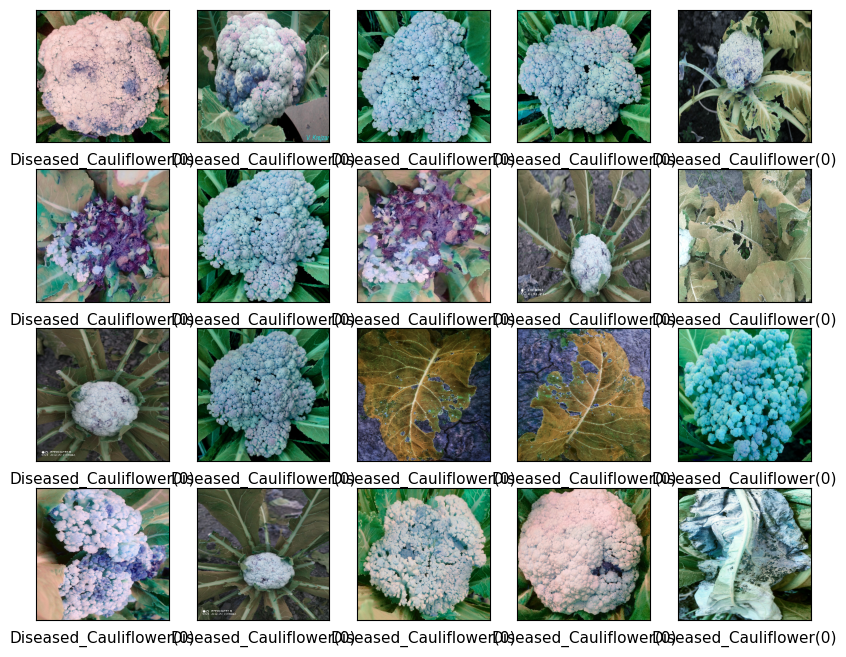

In [8]:
#visualization
plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_data[i])
    plt.xlabel(y_data[i])
    label = y_data[i]
    plt.xlabel(f"{labels[label]}({label})")
   

plt.show()

In [8]:
#splitting the val and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(x_data, y_data, test_size=0.3, random_state=1, stratify=y_data) 
x_test, x_val, y_test, y_val  = train_test_split(x_test, y_test, test_size=0.8, random_state=1, stratify=y_test) 


In [9]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

#check classes are balanced
print("Unique Categories counts :",np.unique(y_train,return_counts=True)[1])
print("Unique Categories counts :",np.unique(y_test,return_counts=True)[1])
print("Unique Categories counts :",np.unique(y_val,return_counts=True)[1])

(459, 256, 256, 3)
(459,)
(158, 256, 256, 3)
(158,)
(39, 256, 256, 3)
(39,)
Unique Categories counts : [315 144]
Unique Categories counts : [27 12]
Unique Categories counts : [108  50]


In [10]:
#Data explortation

#size
print('Training size:', x_train.shape[0])
print('Testing sizes:', x_test.shape[0])
print('Testing sizes:', x_val.shape[0])
#dimension
print('Train Images dimension:',x_train.shape[1:])


print('Largest pixel value:',np.amax(x_train))

Training size: 459
Testing sizes: 39
Testing sizes: 158
Train Images dimension: (256, 256, 3)
Largest pixel value: 255


In [11]:
#normalizing
x_train = x_train /255
x_test = x_test /255
x_val = x_val /255
from keras.utils import to_categorical

#one hot encode
y_train  = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

In [12]:
input = (256, 256,3)

In [13]:
#sample model I took from deep assignment to check is the data is in correct form, its really bad, maybe the data is too little or I am missing something

input = (256, 256,3)
cnn_model_asmae = Sequential()

cnn_model_asmae.add(Conv2D(200,(3, 3), activation='relu', strides=(1,1), input_shape=(input)))
cnn_model_asmae.add(MaxPooling2D((2,2)))

cnn_model_asmae.add(Conv2D(100, (3,3), activation='relu'))
cnn_model_asmae.add(MaxPooling2D((2, 2)))


cnn_model_asmae.add(Flatten())
cnn_model_asmae.add(Dropout(0.5))


cnn_model_asmae.add(Dense(64, activation='relu'))

cnn_model_asmae.add(Dense(2, activation='softmax'))

cnn_model_asmae.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

cnn_model_asmae.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 200)     5600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 200)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 100)     180100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 384400)            0         
                                                                 
 dropout (Dropout)           (None, 384400)            0

In [23]:
cnn_model_asmae.fit(x_train,y_train, epochs=4, validation_data=(x_val,y_val)
    ,callbacks=[tf.keras.callbacks.ModelCheckpoint("Cauliflower_best_model.h5",save_best_only=True,save_weights_only=False)])

Epoch 1/4
15/15 [==============================] - 125s 8s/step - loss: 0.1372 - accuracy: 0.9390 - val_loss: 0.2964 - val_accuracy: 0.9051
Epoch 2/4
15/15 [==============================] - 111s 7s/step - loss: 0.1101 - accuracy: 0.9608 - val_loss: 0.0557 - val_accuracy: 0.9747
Epoch 3/4
15/15 [==============================] - 119s 8s/step - loss: 0.0867 - accuracy: 0.9739 - val_loss: 0.1527 - val_accuracy: 0.9430
Epoch 4/4
15/15 [==============================] - 131s 8s/step - loss: 0.0709 - accuracy: 0.9739 - val_loss: 0.0907 - val_accuracy: 0.9747


In [24]:
scores = cnn_model_asmae.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 100.00%


### Complex Model 

In [25]:
cnn_model_asmae.save_weights('cauliflower_model_weights.h5')
json_string = cnn_model_asmae.to_json()
f = open("cauliflower_model_architecture.json",'w')
f.write(json_string)
f.close()